# ECBM E4040 - Assignment 2- Task 5: Kaggle Open-ended Competition

Kaggle is a platform for predictive modelling and analytics competitions in which companies and researchers post data and statisticians and data miners compete to produce the best models for predicting and describing the data.

If you don't have a Kaggle account, feel free to join at [www.kaggle.com](https://www.kaggle.com). To let the CAs do the grading more conveniently, please __use Lionmail to join Kaggle__ and __use UNI as your username__.

The website for this competition is: 
https://www.kaggle.com/c/e4040fall2019-assignment-2-task-5

You can find detailed description about this in-class competition on the website above. Please read carefully and follow the instructions.

<span style="color:red">__TODO__:</span>
1. Train a custom model for the bottle dataset classification problem. You are free to use any methods taught in the class or found by yourself on the Internet (ALWAYS provide reference to the source) but __TF 2.0 is not allowed to use in this competition__. General training methods include:
    * Dropout
    * Batch normalization
    * Early stopping
    * l1-norm & l2-norm penalization
2. You'll be given the test set to generate your predictions (70% public + 30% private, but you don't know which ones are public/private). Achieve 70% accuracy on the public test set. The accuracy will be shown on the public leaderboard once you submit your prediction .csv file. The private leaderboard would be released after the competition. The final ranking would based on that result, not the public one.
3. 

    * Report your results on the Kaggle, for comparison with other students' optimal results (you can do this several times). 
    * Save your best model, using Github Classroom, at the same time when you submit the homework files into Courseworks. See instructions below. 

__Hint__: You can start from what you implemented in task 4. Another classic classification model named 'VGG16' can also be easily implemented.

## HW Submission Details:
There are three components to reporting the results of this task: 

**(A) Submission (up to 20 submissions each day) of the .csv prediction file throught the Kaggle platform;**. You should start doing this __VERY early__, so that students can compare their work as they are making progress with model optimization.

**(B) Editing and submitting the content of this Jupyter notebook, through Courseworks; **
(i) The code for your CNN model and for the training function. The code should be stored in __./ecbm4040/neuralnets/kaggle.py__;
(ii) Print out your training process and accuracy __within this notebook__;

**(C) Submitting your best CNN model through Github Classroom repo.**

**Description of (C):** 
For this task, we will continue to use Github classroom to save your model for submission. 

<span style="color:red">__Submission content:__ :</span>
(i) In your Assignment 2 submission folder, create a subfolder called __KaggleModel__. Upload your best model with all the data output (for example, __MODEL.data-00000-of-00001, MODEL.meta, MODEL.index__) into the folder. 
(ii) Remember to delete any intermediate results, **we only want your best model. Do not upload any data files**. The instructors will rerun the uploaded best model and verify against the score which you reported on the Kaggle.



## Train your model here

In [1]:
import cv2

In [2]:
from os import listdir
from matplotlib import image
import numpy as np
from scipy import ndimage, misc

# load all images in a directory
loaded_images = list()
loaded_y = list()
X_test = list()
img_size =64
for folder in listdir('data/kaggle_train_128/train_128/'):
    clas = ('data/kaggle_train_128/train_128/'+ folder+'/')
    value = int(folder)
    print("Loading Data of Class {}".format(value))
    for filename in listdir(clas):
        img_data = cv2.resize(image.imread(clas + filename), (img_size, img_size),interpolation = cv2.INTER_AREA)
        #img_data = misc.imresize(img_data, (64, 64))
        loaded_images.append(img_data)
        loaded_y.append(value)
print("Data Loaded")
X_train=np.asarray(loaded_images)
y_train = np.asarray(loaded_y)
print(y_train[2990:3010])
print("shuffling..")
seq = np.arange(len(y_train))
np.random.shuffle(seq)
X_train, y_train = X_train[seq], y_train[seq]
print("shuffling done...")
for filename in listdir('data/kaggle_test_128/test_128/'):
        img_data = cv2.resize(image.imread('data/kaggle_test_128/test_128/' + filename), (img_size, img_size),interpolation = cv2.INTER_AREA)
        X_test.append(img_data)
X_test = np.asarray(X_test)
X_val, y_val = X_train[-500:-1] , y_train[-500:-1]
X_train, y_train = X_train[:-500] , y_train[:-500]
print("All data Loaded..")

Loading Data of Class 0
Loading Data of Class 1
Loading Data of Class 2
Loading Data of Class 3
Loading Data of Class 4
Data Loaded
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
shuffling..
shuffling done...
All data Loaded..


In [8]:
data_train, data_val = X_train, X_val
import cv2

In [9]:
#print(y_val)
X_train, X_val = data_train, data_val
print(X_train.shape)

(14500, 64, 64, 3)


"\nax = fig.add_subplot(4,4,i+1)\nax.imshow(X_train1[i,:].reshape(128,128,3), 'rgb')\nax.axis('off')\n"

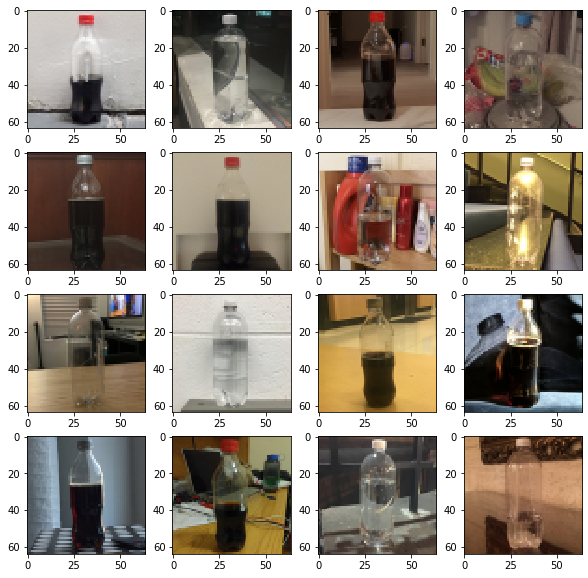

In [11]:
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate
import matplotlib.image as mpimg
X_train, X_val = data_train, data_val
mean_image = np.mean(X_train, axis=0)
var_image = np.var(X_train, axis=0)
epsilon = 1e-5

"""
X_train -=  mean_image
X_val -=  mean_image
X_train = np.divide(X_train, np.sqrt(var_image+0.000001))
X_val = np.divide(X_val, np.sqrt(var_image+0.000001))
min_image = np.min(X_train, axis=0)
X_train += min_image
X_val += min_image
"""
fig = plt.figure(figsize=(10,10))

for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(X_train[i])
"""
fig = plt.figure(figsize=(10,10))
for i in range(16):
    image = (X_train[i])
    plt.imshow(image)
    plt.show()
"""
"""
ax = fig.add_subplot(4,4,i+1)
ax.imshow(X_train1[i,:].reshape(128,128,3), 'rgb')
ax.axis('off')
"""

In [5]:

from utils.image_generator import ImageGenerator
import tensorflow as tf

C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorf

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.applications import VGG19
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg19 import preprocess_input
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as one_hot

In [19]:
y_train_1hot = one_hot(y_train)
y_val_1hot = one_hot(y_val)

In [35]:
base_model=VGG19(include_top=False, weights='imagenet', input_shape=(64,64,3), classes=5) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(64,activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(64,activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(64,activation='relu')(x)
x=BatchNormalization()(x)
preds=Dense(5,activation='softmax')(x) 


In [36]:
model = Model(inputs=base_model.input, outputs =preds)
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [37]:
 
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [41]:
bs = 64 
epc = 5 
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
train_generator = train_datagen.flow(X_train, y_train_1hot, batch_size=bs)
step_size_train=train_generator.n//train_generator.batch_size


In [ ]:
 
his = model.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=(X_val, y_val_1hot))


Epoch 1/5
227/227 [==============================] - 573s 3s/step - loss: 1.4052 - acc: 0.3934 - val_loss: 12.9447 - val_acc: 0.1964
Epoch 2/5
179/227 [======================>.......] - ETA: 1:57 - loss: 1.2664 - acc: 0.4636

In [7]:
tf.reset_default_graph()
from utils.neuralnets.cnn.kaggle_model_2 import my_training_task
#X_train = X_train[:10000]

my_training_task(X_train, y_train, X_val, y_val,
         conv_featmap=[32,32,16,16],
         fc_units=[256,128],
         conv_kernel_size=[3,3,3,3],
         pooling_size=[2,2,2,2],
         l2_norm=0.01,
         seed=235,
         learning_rate= 3e-3,
         epoch=3,
         batch_size=64,
         verbose=False,
         pre_trained_model=None)
"""
my_training_task(X_train, y_train, X_val, y_val, 
         conv_featmap=[32,32,32,32],
         fc_units=[128,128],
         conv_kernel_size=[3,3,3],
         pooling_size=[2,2,2],
         l2_norm=0.01,
         seed=235,
         learning_rate= 3e-3,
         epoch=5,
         batch_size=64,
         verbose=False,
         pre_trained_model=None)
"""

Building example LeNet. Parameters: 
conv_featmap=[32, 32, 16, 16]
fc_units=[256, 128]
conv_kernel_size=[3, 3, 3, 3]
pooling_size=[2, 2, 2, 2]
l2_norm=0.01
seed=235
learning_rate=0.003
Xtrain shape=(14500, 64, 64, 3)
Xtrain shape=(14500, 64, 64, 3)
Channel_size=3
number of batches for training: 226
epoch 1 
40
80
Best validation accuracy! iteration:100 accuracy: 21.6432865731463%
120
160
200
epoch 2 
240
280
320
360
400
440
epoch 3 
480
Best validation accuracy! iteration:500 accuracy: 23.04609218436873%
520
560
600
640
Traning ends. The best valid accuracy is 23.04609218436873. Model named lenet_1573018320.


'\nmy_training_task(X_train, y_train, X_val, y_val, \n         conv_featmap=[32,32,32,32],\n         fc_units=[128,128],\n         conv_kernel_size=[3,3,3],\n         pooling_size=[2,2,2],\n         l2_norm=0.01,\n         seed=235,\n         learning_rate= 3e-3,\n         epoch=5,\n         batch_size=64,\n         verbose=False,\n         pre_trained_model=None)\n'

## Save your best model

In [31]:
# YOUR CODE HERE
print(please_output)

None


## Generate .csv file for Kaggle

In [ ]:
 The following code snippet can be used to generate your prediction .csv file.

import csv
with open('predicted.csv','w') as csvfile:
    fieldnames = ['Id','label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index,l in enumerate(predicted_values_generated_by_your_model):
        filename = str(index)+'.png'
        label = str(l)
        writer.writerow({'Id': filename, 'label': label})